## Universal Approximation 

In [67]:
import numpy as np
x = torch.Tensor([0.6373, 2.0517, 0.21299, -0.48576, -0.92179, 0.24809, 0.40409, 0.19031, -0.31677, 1.2812, -0.015976, -0.67058, -0.95553, -2.5868, -0.23984, 1.0187, 0.78393, 1.9629, -0.056186, 0.60923, 1.1868, -0.82416, 1.0349, -1.6482, -1.1432, 0.37964, 1.5819, -1.1218, 0.56133, 0.19066, -0.50102, -0.10873, -0.86301, 0.73113, -0.36435, -0.3426, -1.3141, -1.5615, 0.54802, 0.12719, 0.65468, -1.0537, 1.1295, 0.22502, 0.11351, -0.40481, -0.97005, 1.0453, 0.46876, 1.0499, -1.9301, -1.3338, 0.0082426, -0.87422, -0.24905, 0.92774, 1.1047, 0.031851, -0.91958, 2.269, 0.70671, 1.8234, 1.5302, -1.1137, 1.9584, 0.63619, 0.80029, -0.28729, -0.68864, -0.72136, -0.76462, -0.4987, 1.6098, 0.0016518, 0.61789, -0.037868, 1.2526, -2.3154, 0.52645, -0.91985, 0.13548, 0.53272, -0.43713, 1.9099, 0.24488, -1.3335, 1.2825, 0.21574, 1.9676, -1.5845, -0.075263, -0.063388, 0.33074, -0.08535, -0.20776, 1.3674, -0.27097, 0.73597, 0.24882, 1.548])


In [68]:
def fun(x):
    return 3.71*x*x*x+4.591*x*x-9.56*x+7

In [69]:
y = np.asarray([fun(x) for x in x])

In [70]:
def y_(x):
    w = torch.Tensor([18.416,-16.9365,-0.0326,5.8652])
    w = w.view(-1,4)
    x = [x**3,x**2,x,1]
    x = torch.Tensor(x)
    x = x.view(4,-1)
    return torch.mm(w,x)

In [71]:
import matplotlib.pyplot as plt

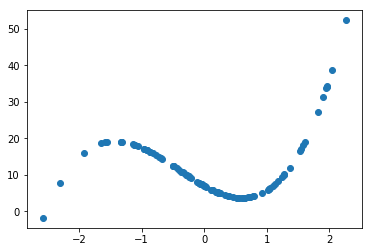

In [72]:
plt.scatter(x,y)
plt.show()

In [73]:
y_pred = []
for i in x:
    i = np.float(i)
    y_pred.append(y_(i))

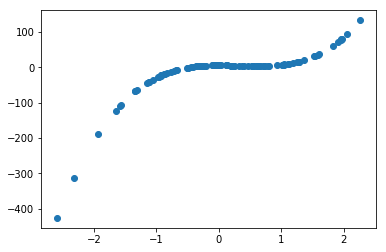

In [74]:
plt.scatter(x,np.asarray(y_pred))
plt.show()

In [124]:
import torch.nn.functional as F
import torch

In [163]:
class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.linear1 = torch.nn.Linear(1,100)
        self.linear2 = torch.nn.Linear(100,1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        return x

net = NN()

In [164]:
criterion = torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [165]:
for epoch in range(100):
    running_loss = 0.0
    for i in range(len(x)):
        x_ = x[i].view(1)
        label = torch.Tensor([y[i]])
        optimizer.zero_grad()
        loss = criterion(label,net(x_))
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    if(epoch%20 ==0):
        print(running_loss)

11847.497787248576
169.17396651503282
217.0878231428187
186.50542741515164
178.6406171284616


In [166]:
net(torch.Tensor([4]))

tensor([133.5745], grad_fn=<ReluBackward0>)

In [167]:
def net_out(x):
    x = torch.Tensor([x])
    return net(x)

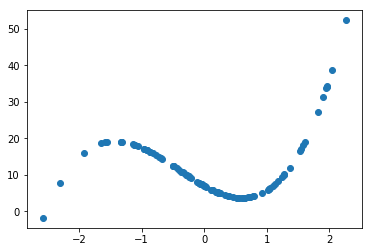

In [168]:
plt.scatter(x,y)
plt.show()

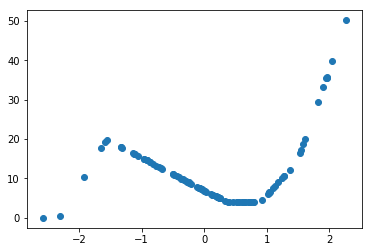

In [169]:
y_pred = []
for i in x:
    i = np.float(i)
    y_pred.append(net_out(i))

plt.scatter(x,np.asarray(y_pred))
plt.show()